In [40]:
import pandas as pd
import numpy as np
import numpy as np
from itertools import combinations, groupby
from collections import Counter

In [2]:
custo=pd.read_csv('olist_customers_dataset.csv')
geo=pd.read_csv('olist_geolocation_dataset.csv')
order_item=pd.read_csv('olist_order_items_dataset.csv')
payments=pd.read_csv('olist_order_payments_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
reviews=pd.read_csv('olist_order_reviews_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
prod_cat=pd.read_csv('product_category_name_translation.csv')

In [3]:
merge1=pd.merge(orders,order_item,on='order_id')

In [4]:
merge2=pd.merge(products,merge1,on='product_id')

In [5]:
merge3=pd.merge(prod_cat,merge2,on='product_category_name')

In [15]:
df=merge3[['order_id','order_item_id','product_id','product_category_name']]

In [16]:
df=pd.merge(df,prod_cat,on='product_category_name')

In [17]:
df.drop('product_category_name',axis=1,inplace=True)

In [18]:
df

,order_id,order_item_id,product_id,product_category_name_english
0,a41753c6a1d8accb89732e36243432d7,1,e3e020af31d4d89d2602272b315c3f6e,health_beauty
1,f6fbf7907913892ffc12ada3bff286ba,1,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty
2,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,c5d8079278e912d7e3b6beb48ecb56e8,health_beauty
3,a63144d37a00c28ef382668a5d5ece8b,1,36555a2f528d7b2a255c504191445d39,health_beauty
4,93d7cfb112111edec49fd02555f48da3,1,e586ebb6022265ae1eea38f46ffe3ead,health_beauty
...,...,...,...,...
111018,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes
111019,9fa3a005f89a187501fa1bd63d6125fb,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes
111020,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,fashion_childrens_clothes
111021,bede3503afed051733eeb4a84d1adcc5,1,8db75af9aed3315374db44d7860e25da,security_and_services


In [69]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [70]:
basket = (df.groupby(['order_id','product_category_name_english'])['order_item_id'].sum().unstack().reset_index()
          .fillna(0).set_index('order_id'))
basket.head()


product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
def encoder(x):
    if x <= 0:
        return 0
    else:
        return 1
    
basket = basket.applymap(encoder)
basket.head()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
items_together = apriori(basket, min_support = 0.0001, use_colnames=True)
items_together

,support,itemsets
0,0.001871,(agro_industry_and_commerce)
1,0.002601,(air_conditioning)
2,0.002077,(art)
3,0.000236,(arts_and_craftmanship)
4,0.003599,(audio)
...,...,...
81,0.000247,"(furniture_decor, housewares)"
82,0.000113,"(housewares, garden_tools)"
83,0.000123,"(perfumery, health_beauty)"
84,0.000144,"(sports_leisure, health_beauty)"


In [212]:
rules = association_rules(items_together, metric='lift', min_threshold=0.01)


In [213]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [106]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


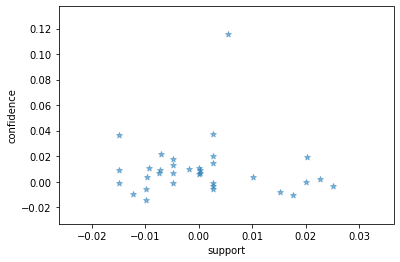

C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  

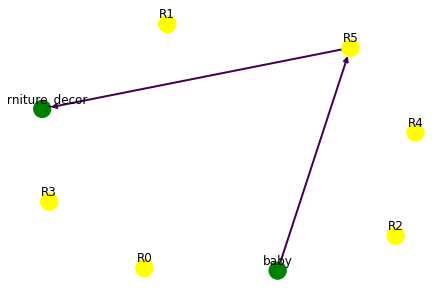

In [110]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()
 
import numpy as np
 
def draw_graph(rules, rules_to_show):
        
    import networkx as nx  
    G1 = nx.DiGraph()

    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   


    for i in range (rules_to_show): 
        
        G1.add_nodes_from(["R"+str(i)])


    for a in rules.iloc[i]['antecedents']:

        G1.add_nodes_from([a])

        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

    for c in rules.iloc[i]['consequents']:

            G1.add_nodes_from([c])

            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       



    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
           pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

     
draw_graph (rules, 6)

In [214]:
antecedents=rules.antecedents

In [215]:
c=[list(x) for x in antecedents]

In [216]:
antecedent=[]
for i in c:
    for j in i:
        antecedent.append(j)

In [217]:
antecedent=pd.Series(antecedent,name='antecedent_')

In [218]:
consequents=rules.consequents

In [219]:
d=[list(x) for x in consequents]

In [220]:
consequents=[]
for i in d:
    for j in i:
        consequents.append(j)

In [221]:
consequents=pd.Series(consequents,name='consequents_')

In [222]:
rules=pd.concat([rules,antecedent,consequents], axis=1)

In [223]:
rules.drop(['antecedents','consequents'], axis=1,inplace=True)

In [227]:
bed_bath=rules[rules.loc[:,'antecedent_']=='bed_bath_table']

In [230]:

import networkx as nx
bed = nx.from_pandas_edgelist(bed_bath, source = 'antecedent_',target='consequents_',edge_attr = True)

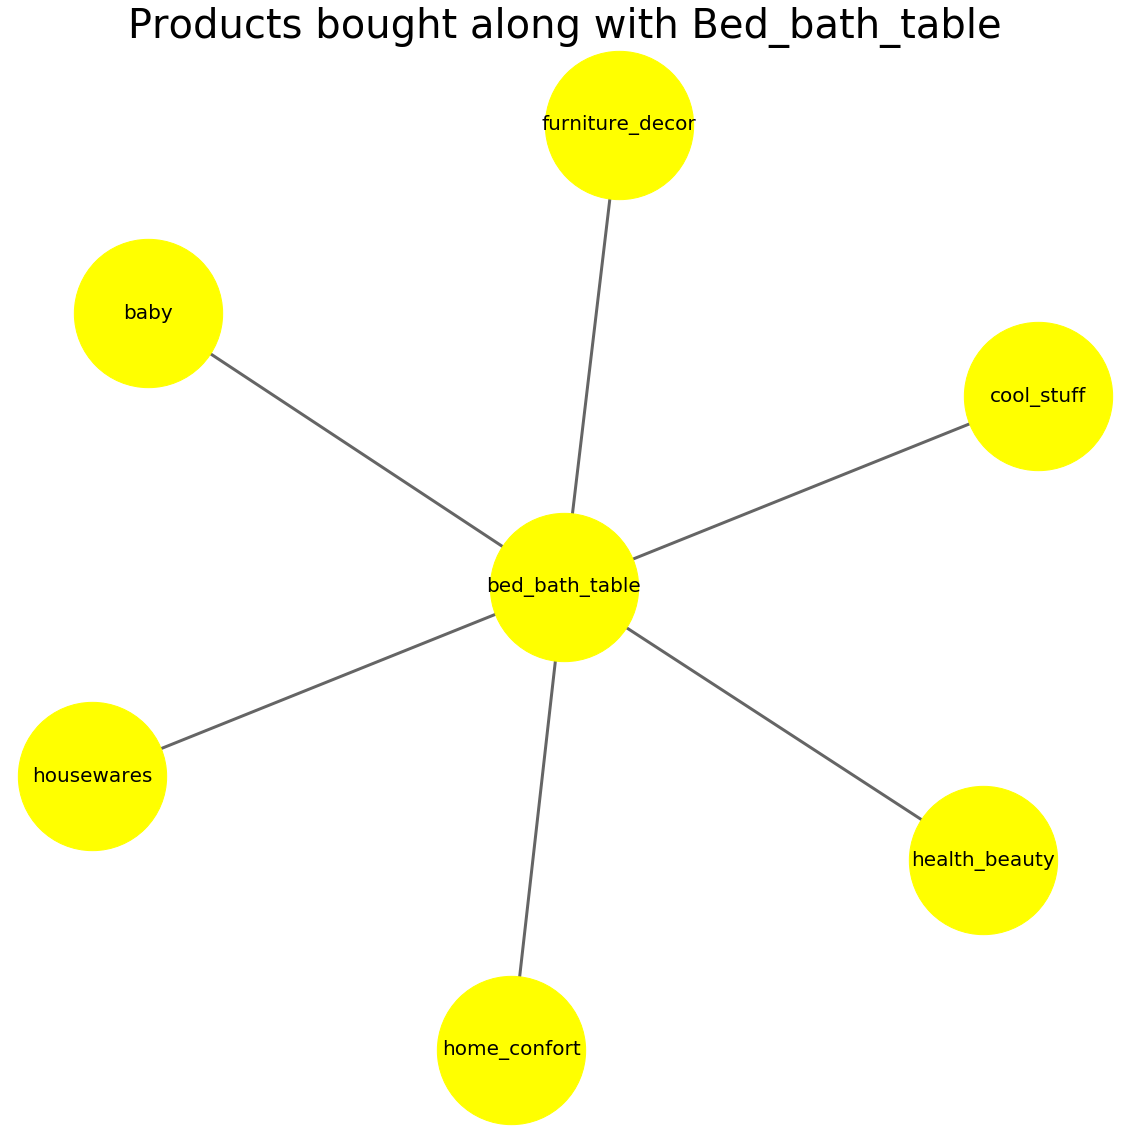

<Figure size 1440x1440 with 0 Axes>

In [236]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(bed)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(bed, pos, node_size = 22000, node_color = 'yellow')
nx.draw_networkx_edges(bed, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(bed, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Products bought along with Bed_bath_table', fontsize = 40)
plt.show()
plt.savefig(f"bed_bath.png")

In [239]:
baby=rules[rules.loc[:,'antecedent_']=='baby']

In [240]:
import networkx as nx
babyy = nx.from_pandas_edgelist(baby, source = 'antecedent_',target='consequents_',edge_attr = True)

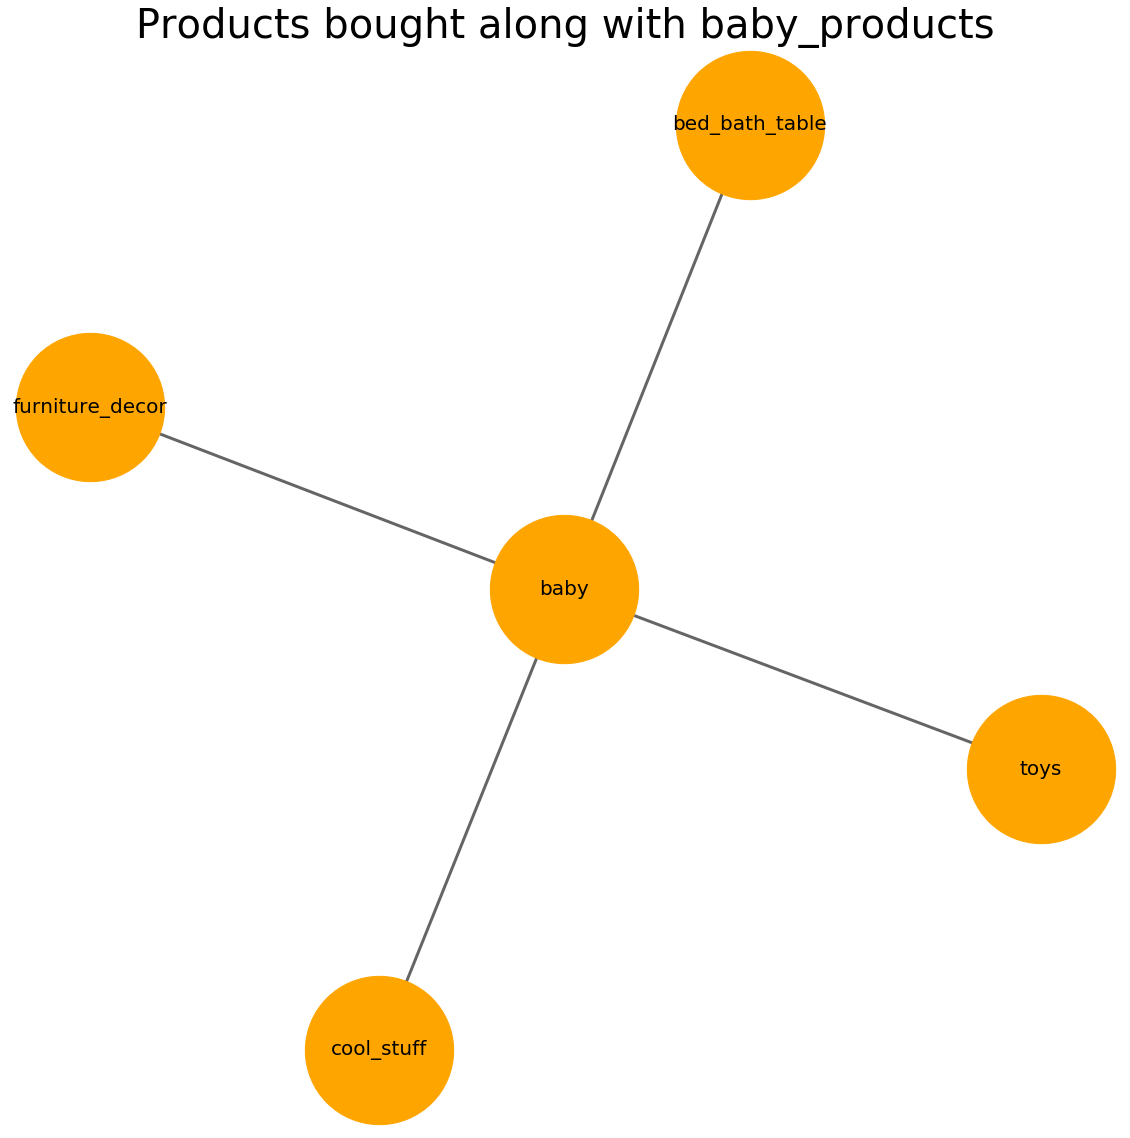

<Figure size 1440x1440 with 0 Axes>

In [242]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(babyy)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(babyy, pos, node_size = 22000, node_color = 'orange')
nx.draw_networkx_edges(babyy, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(babyy, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Products bought along with baby_products', fontsize = 40)
plt.show()
plt.savefig(f"baby.png")

In [291]:
c=list(rules.antecedent_.unique())

In [262]:
colors=['pink','red','blue','mediumpurple','orange','green','cyan','yellow','crimson','fuchsia','navy','aqua','darkturquoise']

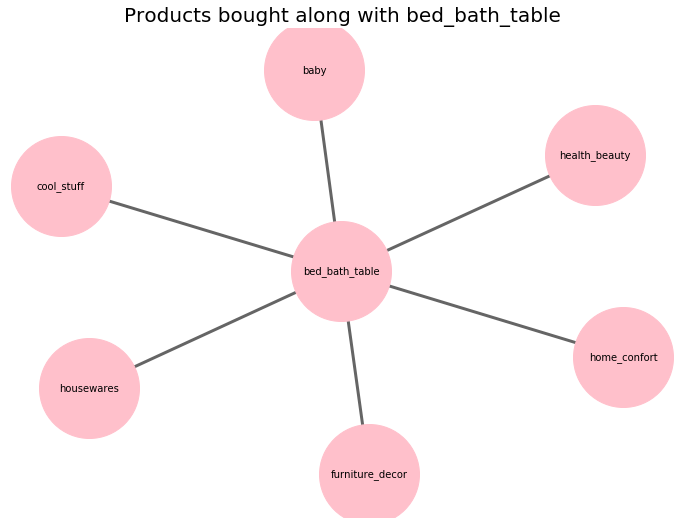

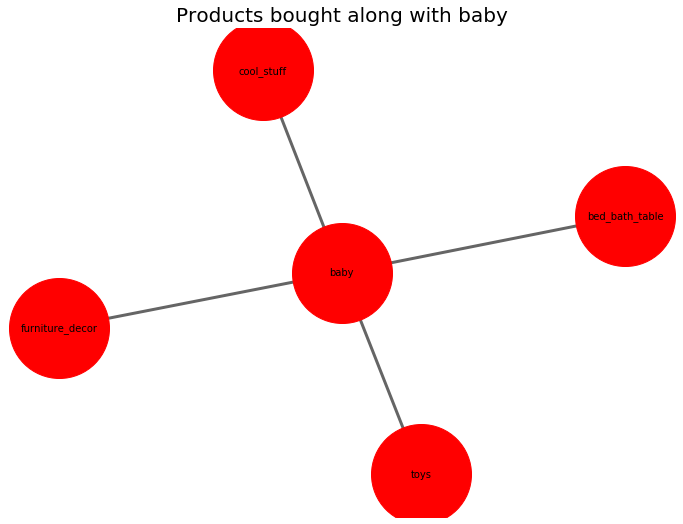

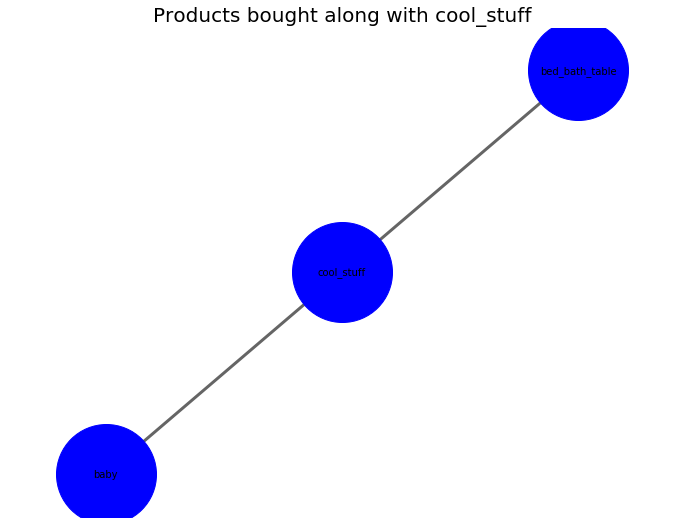

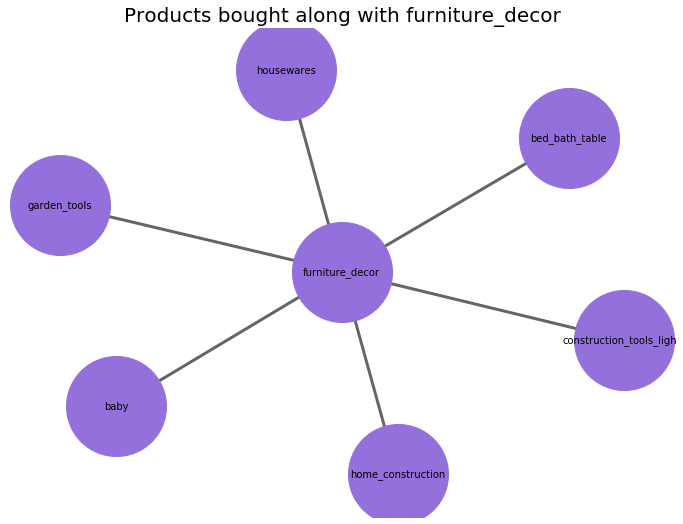

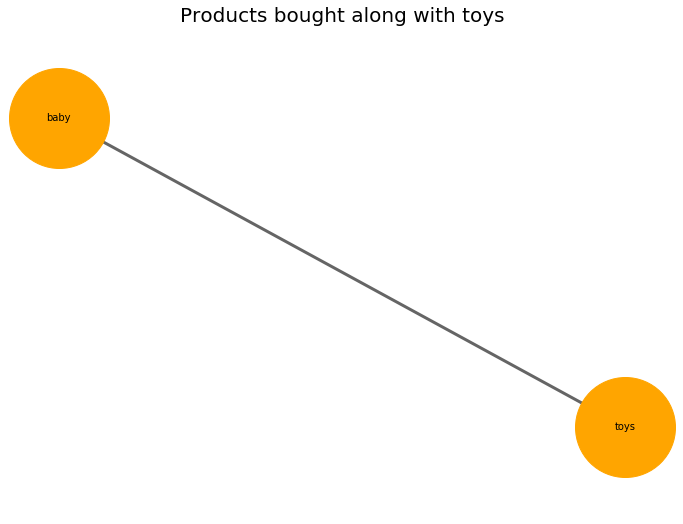

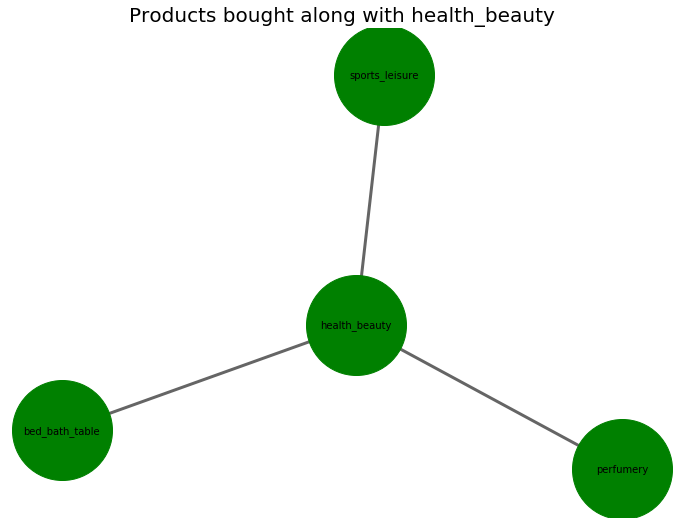

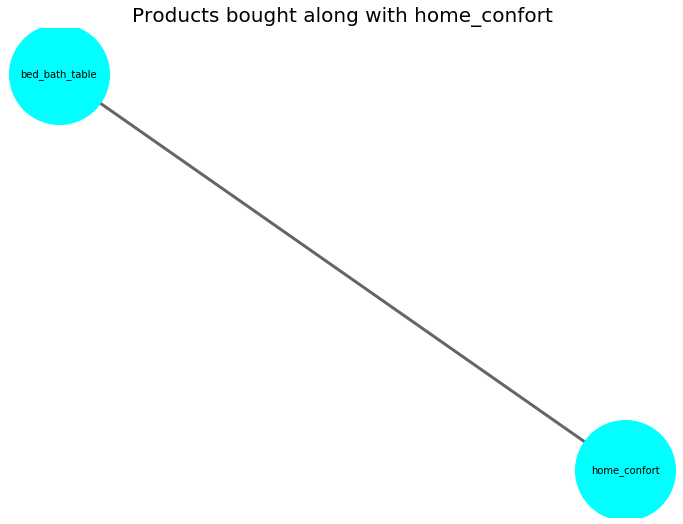

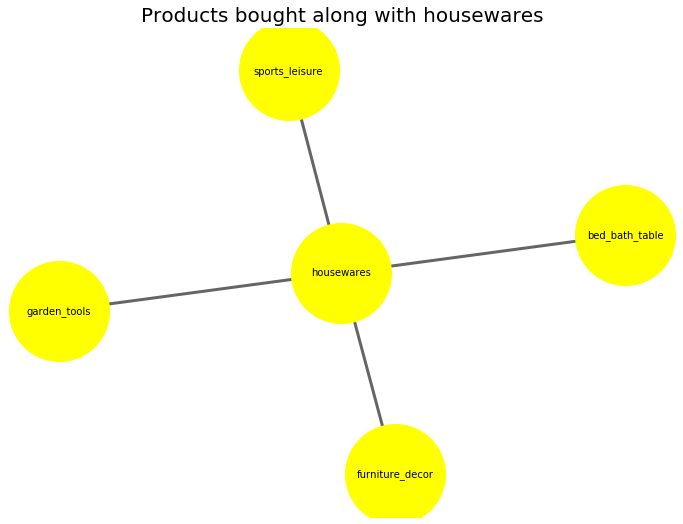

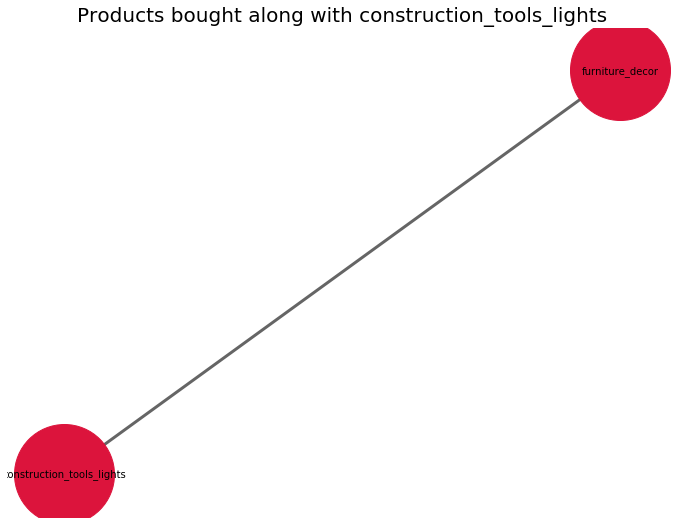

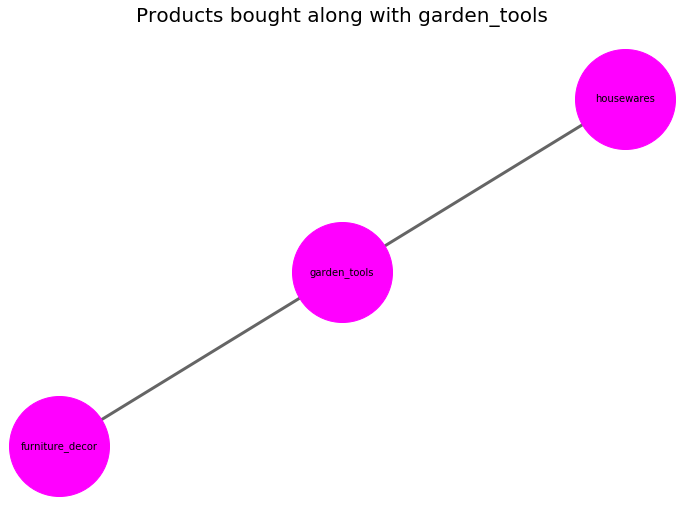

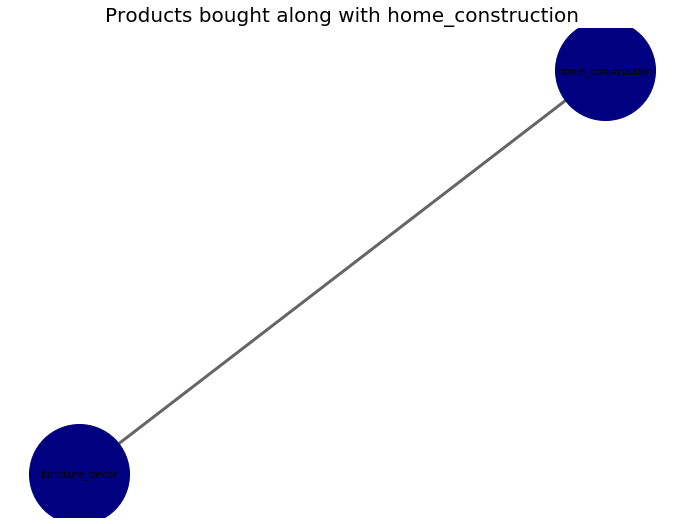

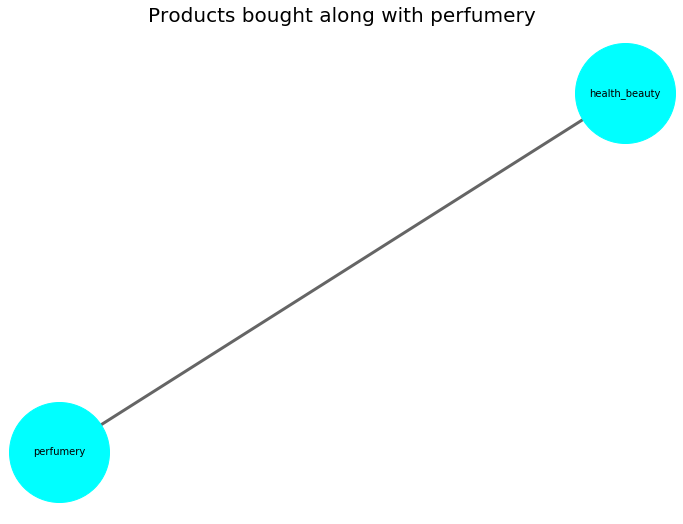

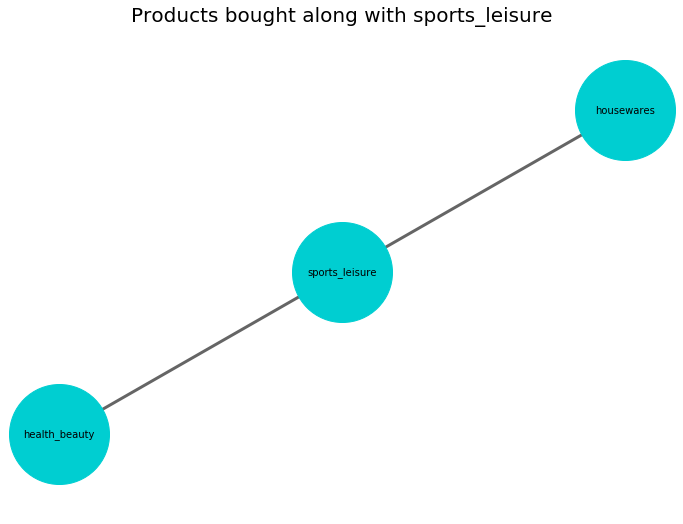

In [284]:
for i in range(len(c)):
    value=rules[rules.loc[:,'antecedent_']==c[i]]
    
    value = nx.from_pandas_edgelist(value, source = 'antecedent_',target='consequents_',edge_attr = True)
    import warnings
    warnings.filterwarnings('ignore')
    plt.rcParams['figure.figsize'] = (12,9)
    pos = nx.spring_layout(value)
    color = plt.cm.Wistia(np.linspace(0, 15, 1))
    
    nx.draw_networkx_nodes(value, pos, node_size = 10000, node_color = colors[i])
    nx.draw_networkx_edges(value, pos, width = 3, alpha = 0.6, edge_color = 'black',arrowstyle='>',arrowsize=10)
    nx.draw_networkx_labels(value, pos, font_size = 10, font_family = 'sans-serif')
    plt.axis('off')
    plt.grid()
    plt.title(f'Products bought along with {c[i]}', fontsize = 20)
    plt.savefig(f"{c[i]}.png", bbox_inches='tight')
    plt.show()

    


In [315]:
list(rules.antecedent_.unique())

['bed_bath_table',
 'baby',
 'cool_stuff',
 'furniture_decor',
 'toys',
 'health_beauty',
 'home_confort',
 'housewares',
 'construction_tools_lights',
 'garden_tools',
 'home_construction',
 'perfumery',
 'sports_leisure']

In [314]:
for i in range(len(c)):
    c[i]=rules[rules.loc[:,'antecedent_']==c[i]]
#     c[i].to_csv(f'{c[i]}.csv')

In [318]:
c[4].to_csv('furniture_decor.csv')

In [319]:
rules.to_csv('Association_rule.csv')

In [320]:
rules

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_,consequents_
0,0.096827,0.029664,0.000175,0.001805,0.060856,-0.002697,0.972091,bed_bath_table,baby
1,0.029664,0.096827,0.000175,0.005893,0.060856,-0.002697,0.908527,baby,bed_bath_table
2,0.029664,0.037345,0.000206,0.006932,0.185633,-0.000902,0.969375,baby,cool_stuff
3,0.037345,0.029664,0.000206,0.005507,0.185633,-0.000902,0.975709,cool_stuff,baby
4,0.066310,0.029664,0.000123,0.001861,0.062728,-0.001844,0.972145,furniture_decor,baby
5,0.029664,0.066310,0.000123,0.004159,0.062728,-0.001844,0.937590,baby,furniture_decor
6,0.039956,0.029664,0.000195,0.004889,0.164824,-0.000990,0.975104,toys,baby
7,0.029664,0.039956,0.000195,0.006586,0.164824,-0.000990,0.966408,baby,toys
8,0.096827,0.037345,0.000103,0.001062,0.028435,-0.003513,0.963679,bed_bath_table,cool_stuff
9,0.037345,0.096827,0.000103,0.002753,0.028435,-0.003513,0.905667,cool_stuff,bed_bath_table


In [35]:
# #Returns freqyeuncy
# def freq(iterable):
#     if type(iterable) == pd.core.series.Series:
#         return iterable.value_counts().rename("freq")
#     else: 
#         return pd.Series(Counter(iterable)).rename("freq")

    
# # Returns number of unique orders
# def order_count(order_item):
#     return len(set(order_item.index))


# # Returns generator that yields item pairs, one at a time
# def get_item_pairs(order_item):
#     order_item = order_item.reset_index().as_matrix()
#     for order_id, order_object in groupby(order_item, lambda x: x[0]):
#         item_list = [item[1] for item in order_object]
              
#         for item_pair in combinations(item_list, 2):
#             yield item_pair
            

# # Returns frequency and support associated with item
# def merge_item_stats(item_pairs, item_stats):
#     return (item_pairs
#                 .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
#                 .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# # Returns name associated with item
# def merge_item_name(rules, item_name):
#     columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
#                'confidenceAtoB','confidenceBtoA','lift']
#     rules = (rules
#                 .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
#                 .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
#     return rules[columns]   

In [36]:
# #Association Rule
# def association_rules(order_item, min_support):

#     print("Starting order_item: {:22d}".format(len(order_item)))


#     # Calculate item frequency and support
#     item_stats             = freq(order_item).to_frame("freq")
#     item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


#     # Filter from order_item items below min support 
#     qualifying_items       = item_stats[item_stats['support'] >= min_support].index
#     order_item             = order_item[order_item.isin(qualifying_items)]

#     print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
#     print("Remaining order_item: {:21d}".format(len(order_item)))


#     # Filter from order_item orders with less than 2 items
#     order_size             = freq(order_item.index)
#     qualifying_orders      = order_size[order_size >= 2].index
#     order_item             = order_item[order_item.index.isin(qualifying_orders)]

#     print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
#     print("Remaining order_item: {:21d}".format(len(order_item)))


#     # Recalculate item frequency and support
#     item_stats             = freq(order_item).to_frame("freq")
#     item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


#     # Get item pairs generator
#     item_pair_gen          = get_item_pairs(order_item)


#     # Calculate item pair frequency and support
#     item_pairs              = freq(item_pair_gen).to_frame("freqAB")
#     item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

#     print("Item pairs: {:31d}".format(len(item_pairs)))


#     # Filter from item_pairs those below min support
#     item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

#     print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


#     # Create table of association rules and compute relevant metrics
#     item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
#     item_pairs = merge_item_stats(item_pairs, item_stats)
    
#     item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
#     item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
#     item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
#     # Return association rules sorted by lift in descending order
#     return item_pairs.sort_values('lift', ascending=False)

In [37]:
# orders = merge3.set_index('order_id')['product_id'].rename('item_id')
# display(orders.head(10))
# type(orders)

order_id
a41753c6a1d8accb89732e36243432d7    e3e020af31d4d89d2602272b315c3f6e
f6fbf7907913892ffc12ada3bff286ba    c5d8079278e912d7e3b6beb48ecb56e8
6a1594b5f5cfc5bac6dcdc3f48f22b5e    c5d8079278e912d7e3b6beb48ecb56e8
a63144d37a00c28ef382668a5d5ece8b    36555a2f528d7b2a255c504191445d39
93d7cfb112111edec49fd02555f48da3    e586ebb6022265ae1eea38f46ffe3ead
3ea7135b7064169abacfc10aa72f2e3a    e586ebb6022265ae1eea38f46ffe3ead
d9f834b712ac280bbbbcd7a3114c240c    75b4372e69a42f8ae1d908c076f547b2
f409f5ae35c08a9135d9e5d15ec6ab67    75b4372e69a42f8ae1d908c076f547b2
dd8c2ff157394afacbcc50a161e1af4e    75b4372e69a42f8ae1d908c076f547b2
396b08e638fbc9a9d6747df738dbd29c    75b4372e69a42f8ae1d908c076f547b2
Name: item_id, dtype: object

pandas.core.series.Series

In [57]:
# %%time
# rules = association_rules(orders, 0.0001)

Starting order_item:                 111023
Items with support >= 0.0001:           32328
Remaining order_item:                111023
Remaining orders with 2+ items:        9652
Remaining order_item:                 23419
Item pairs:                            4314
Item pairs with support >= 0.0001:       4314

Wall time: 717 ms


C:\Users\Mathi Azhakan C R\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [58]:
rules

,item_A,item_B,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
4211,701657bde0d39ea77205d996a89d9009,f22c326211220c21017efac98a117b2c,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
2897,779e74ce337266c06bf392935ab34bc8,eeab31cd2a4bcd64e6b249e0a674b3a8,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
4299,73bcea4312cb31d72bffc6562f7f7c71,96627b65a0070635b620d07f97e63347,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
3591,1d1e5ff7c1fe84990f92d41f7425b789,8ab78b6f871fd72d1ef38097498b70b7,2,0.020721,1,0.010361,2,0.020721,2.000000,1.000000,96.520000
595,37dffde0476450e75dae423136954b0f,8a2d3285de64b2117fbf83784acd09fc,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
...,...,...,...,...,...,...,...,...,...,...,...
3977,35afc973633aaeb6b877ff57b2793310,35afc973633aaeb6b877ff57b2793310,10,0.103605,50,0.518027,50,0.518027,0.200000,0.200000,0.386080
3286,53759a2ecddad2bb87a079a1f1519f73,53759a2ecddad2bb87a079a1f1519f73,119,1.232905,174,1.802735,174,1.802735,0.683908,0.683908,0.379372
3283,389d119b48cf3043d311335e499d9c6b,389d119b48cf3043d311335e499d9c6b,108,1.118939,167,1.730211,167,1.730211,0.646707,0.646707,0.373773
1430,aca2eb7d00ea1a7b8ebd4e68314663af,aca2eb7d00ea1a7b8ebd4e68314663af,111,1.150021,181,1.875259,181,1.875259,0.613260,0.613260,0.327027


In [59]:
# prod=pd.merge(products,prod_cat,on='product_category_name')

In [60]:
# item_name=prod.loc[:,['product_id','product_category_name_english']]

In [61]:
# item_name   = item_name.rename(columns={'product_id':'item_id', 'product_category_name_english':'item_name'})

In [62]:
item_name

,item_id,item_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery
...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery


In [63]:
# rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
# display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,fashion_underwear_beach,fashion_underwear_beach,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
12,fashion_bags_accessories,fashion_bags_accessories,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
23,small_appliances_home_oven_and_coffee,small_appliances_home_oven_and_coffee,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
22,toys,toys,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
21,sports_leisure,sports_leisure,1,0.010361,1,0.010361,1,0.010361,1.000000,1.000000,96.520000
...,...,...,...,...,...,...,...,...,...,...,...
4309,home_confort,home_confort,10,0.103605,50,0.518027,50,0.518027,0.200000,0.200000,0.386080
4310,garden_tools,garden_tools,119,1.232905,174,1.802735,174,1.802735,0.683908,0.683908,0.379372
4311,garden_tools,garden_tools,108,1.118939,167,1.730211,167,1.730211,0.646707,0.646707,0.373773
4312,furniture_decor,furniture_decor,111,1.150021,181,1.875259,181,1.875259,0.613260,0.613260,0.327027


In [66]:
# rules_final[rules_final['itemA']=='perfumery']

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
126,perfumery,perfumery,10,0.103605,5,0.051803,5,0.051803,2.000000,2.000000,38.608000
349,perfumery,perfumery,6,0.062163,4,0.041442,4,0.041442,1.500000,1.500000,36.195000
355,perfumery,perfumery,6,0.062163,4,0.041442,4,0.041442,1.500000,1.500000,36.195000
353,perfumery,perfumery,6,0.062163,4,0.041442,4,0.041442,1.500000,1.500000,36.195000
321,perfumery,perfumery,6,0.062163,4,0.041442,4,0.041442,1.500000,1.500000,36.195000
...,...,...,...,...,...,...,...,...,...,...,...
4090,perfumery,perfumery,3,0.031082,8,0.082884,8,0.082884,0.375000,0.375000,4.524375
4120,perfumery,perfumery,2,0.020721,7,0.072524,7,0.072524,0.285714,0.285714,3.939592
4206,perfumery,perfumery,6,0.062163,14,0.145048,14,0.145048,0.428571,0.428571,2.954694
4269,perfumery,perfumery,2,0.020721,10,0.103605,10,0.103605,0.200000,0.200000,1.930400


In [165]:
import xgboost